In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"..\synthetic data\nights_features.csv",index_col=0)


In [4]:
df.columns

Index(['REGON', 'OKRES', 'RO', 'WON', 'POW', 'GMN', 'KKR', 'D8R01', 'D8R02',
       'D8R2', 'year', 'month', 'date', 'quarter', 'D8R2_mean_gmn',
       'D8R2_mean_pow', 'D8R2_mean_won', 'D8R2_quarter_mean', 'mean_3m',
       'mean_6m', 'mean_9m', 'mean_12m'],
      dtype='object')

In [5]:
# --- 1. Columns to exclude from the model ---
cols_to_drop = ['REGON','D8R2', 'WON', 'POW', 'GMN', 'D8R01', 'D8R02','date']

In [6]:
# --- 2. List to store summary results ---
results = []


MODEL FOR KKR = 276
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 31
Tree depth: 5
Mean Squared Error (MSE): 114201.62
R²: 0.259


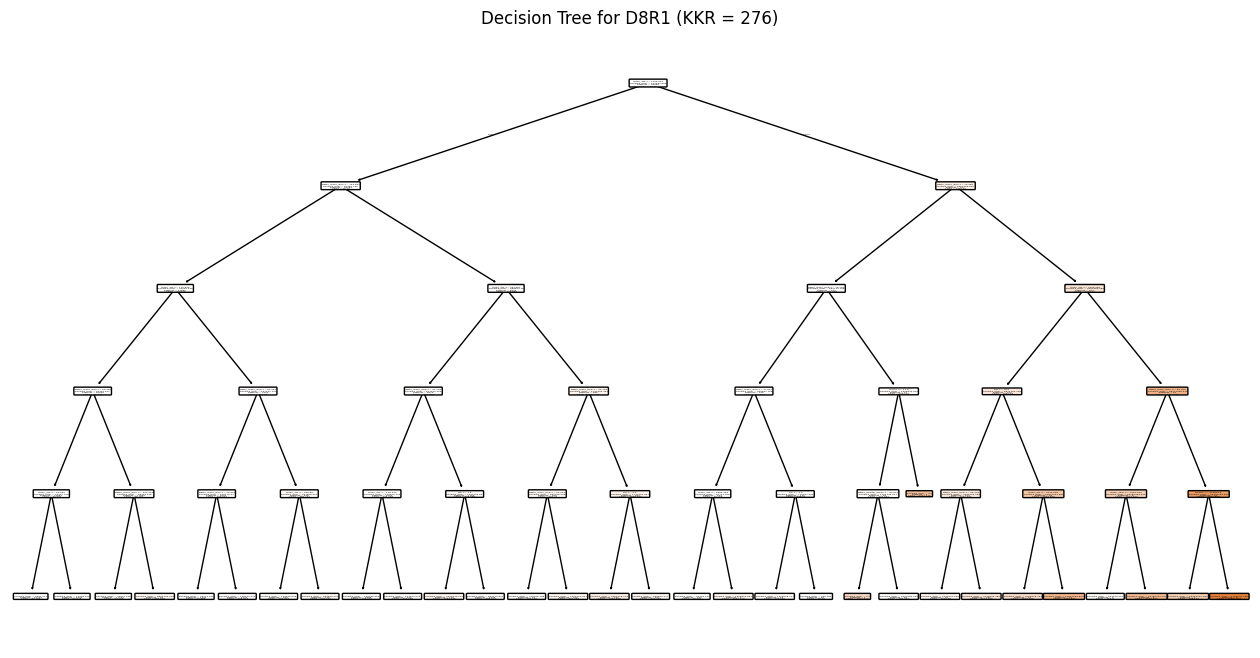


MODEL FOR KKR = 380
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 32
Tree depth: 5
Mean Squared Error (MSE): 20964.14
R²: -0.448


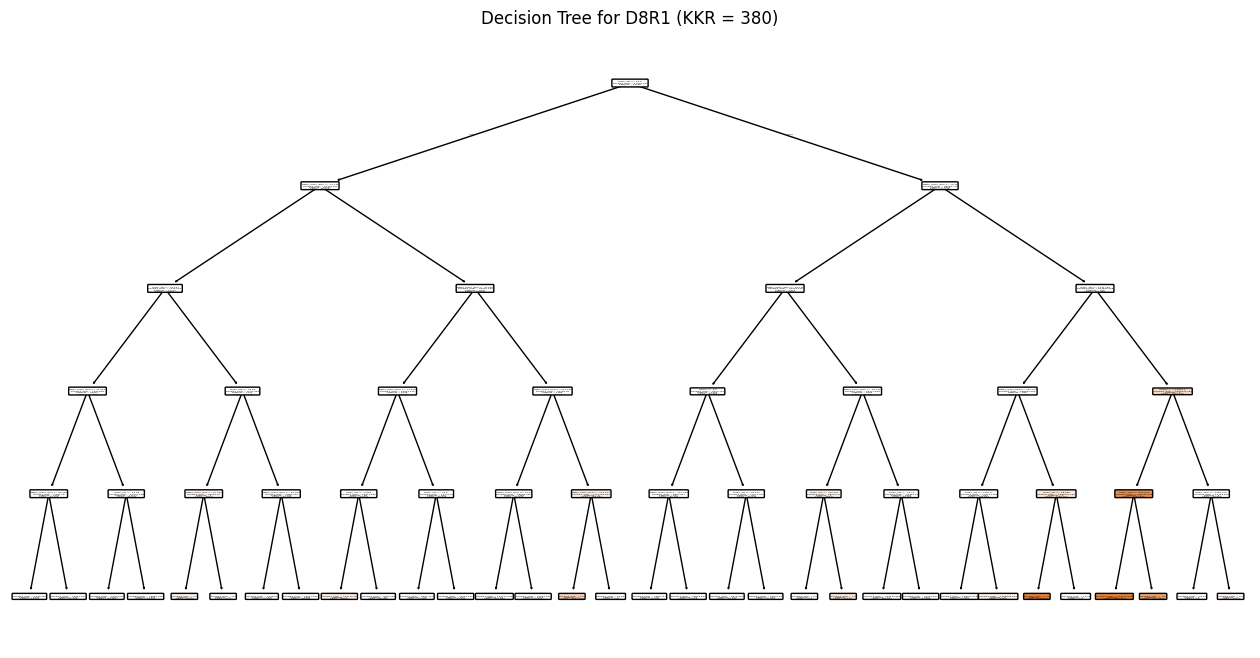


MODEL FOR KKR = 804
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 31
Tree depth: 5
Mean Squared Error (MSE): 48923.58
R²: 0.072


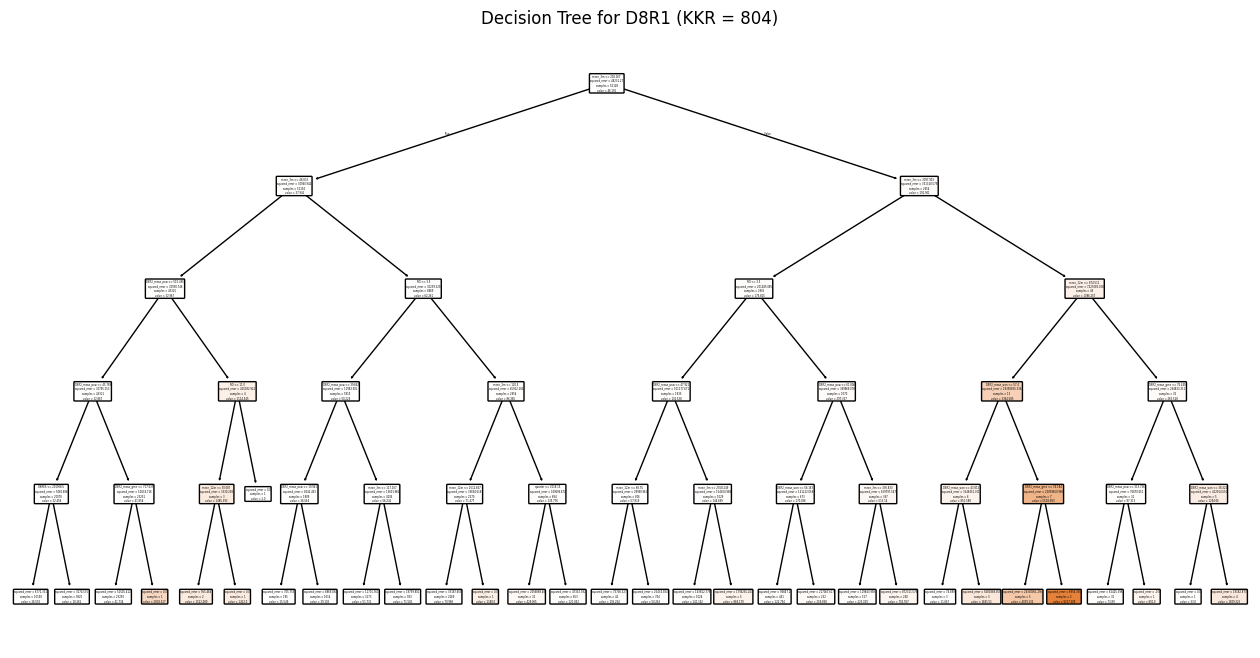


MODEL FOR KKR = 826
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 32
Tree depth: 5
Mean Squared Error (MSE): 45519.24
R²: -0.022


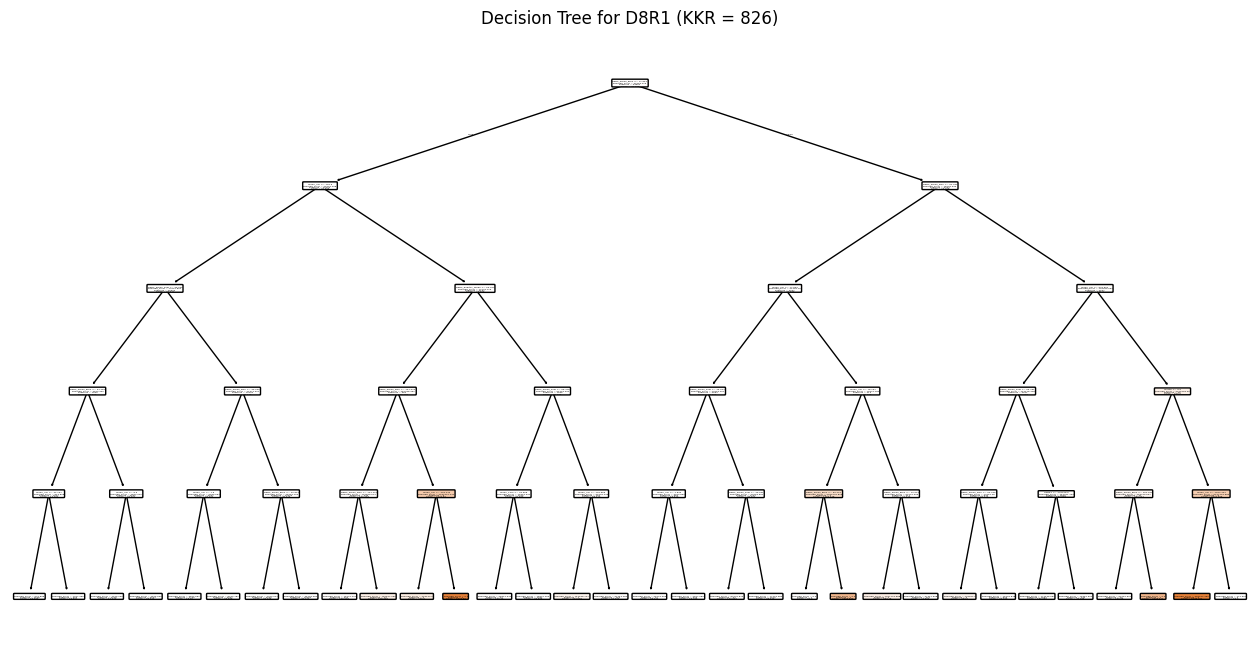


MODEL FOR KKR = 840
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 28
Tree depth: 5
Mean Squared Error (MSE): 45864.20
R²: 0.006


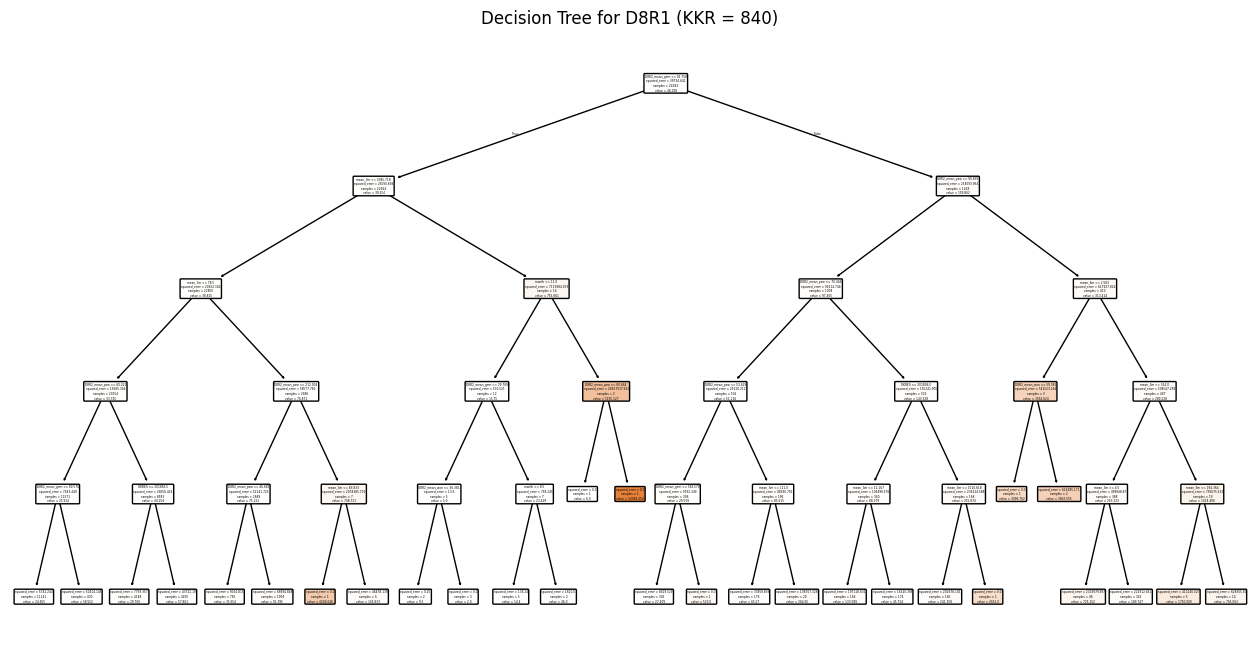


=== SUMMARY OF DECISION TREE MODELS BY KKR ===
   KKR  n_leaves  depth        MSE     R2
0  276        31      5  114201.62  0.259
1  380        32      5   20964.14 -0.448
2  804        31      5   48923.58  0.072
3  826        32      5   45519.24 -0.022
4  840        28      5   45864.20  0.006


In [7]:

# --- 3. Loop through each unique KKR value ---
for kkr_value in df['KKR'].unique():
    print(f"\n{'='*40}")
    print(f"MODEL FOR KKR = {kkr_value}")
    print(f"{'='*40}")
    
    # Filter data for a specific KKR
    df_kkr = df[df['KKR'] == kkr_value].copy()
    
    # --- Remove missing values in the dependent variable ---
    df_kkr = df_kkr.dropna(subset=['D8R2'])
    
    # Skip if there are too few records
    if len(df_kkr) < 10:
        print("Too few observations – skipping.")
        continue

    # Define independent (X) and dependent (y) variables
    X = df_kkr.drop(columns=cols_to_drop, errors='ignore')
    y = df_kkr['D8R2']

    # Remove missing values in features
    X = X.dropna(axis=0)
    y = y.loc[X.index]

    if len(X) < 5:
        print("Too few data points after cleaning – skipping.")
        continue

    # --- 4. Split into training and test sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # --- 5. Build the decision tree model ---
    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # --- 6. Predictions and evaluation ---
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # --- 7. Print model parameters and results ---
    print("Model parameters:")
    print(model.get_params())
    print(f"Number of leaves: {model.get_n_leaves()}")
    print(f"Tree depth: {model.get_depth()}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R²: {r2:.3f}")

    # --- 8. Save model summary for later analysis ---
    results.append({
        'KKR': kkr_value,
        'n_leaves': model.get_n_leaves(),
        'depth': model.get_depth(),
        'MSE': round(mse, 2),
        'R2': round(r2, 3)
    })

    # --- 9. Plot the decision tree ---
    plt.figure(figsize=(16, 8))
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree for D8R1 (KKR = {kkr_value})")
    plt.show()

# --- 10. Display summary table ---
results_df = pd.DataFrame(results)
print("\n=== SUMMARY OF DECISION TREE MODELS BY KKR ===")
print(results_df)


Prediction accuracy:

R² values are generally low or negative, indicating that the decision trees explain very little (or even less than the mean) of the variability in the number of nights tourists spend.

MSE values are relatively high, especially for KKR 276 (114201.62), showing that the predictions often deviate substantially from actual values.

Regional patterns:

KKR 276 shows the best performance among the five regions (R² = 0.259), but still explains only about 26% of the variance in tourist nights.

KKRs 380 and 826 have negative R², meaning the model performs worse than a simple average of the data — suggesting very high variability in tourist stays or insufficient predictive features.

KKRs 804 and 840 have near-zero R², meaning the model barely captures any meaningful patterns.

Tree complexity:

All trees are limited to depth = 5 with ~28–32 leaves.

While this prevents overfitting, it may also underfit the data, failing to capture the complexity of tourist behavior across different regions

Decision trees of depth 5 are too simple for accurate predictions of foreign tourist nights in these KKRs.

High variability in tourist stays and limited explanatory features lead to low predictive performance.

Next steps could include:

Using Random Forest or Gradient Boosting to improve predictions.

Including additional explanatory variables (e.g., seasonal factors, events, or local attractions).

Experimenting with deeper trees or ensemble methods to capture complex patterns.